#### Key Points
- feature creation is in data_pre.py
- Scoring can be seen towards the end section 
- In between code is development code and is not quite clean

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import time
from imp import reload

In [2]:
%matplotlib notebook
plt.style.use('bmh')

In [3]:
import data_prep as dp

In [4]:
data = pd.read_csv('Data.csv')

In [5]:
data.set_index('visitor_id', inplace = True)

In [6]:
data["visits_int_arr"] = data['visits'].apply(lambda row : np.array([int(x) for x in row.split(' ')]))

data['visits_week'] = data['visits_int_arr'].apply(lambda row : np.where((row%7) == 0, row//7,row//7 + 1 ))

# no. of visits per person
data['visit_count'] = data['visits_int_arr'].apply(lambda x : len(x))

# first day and last day of visit 
data['first_day'] = data['visits_int_arr'].apply(lambda x : np.min(x))
data['last_day'] = data['visits_int_arr'].apply(lambda x : np.max(x))

In [1076]:
np.bincount(train_1_Y)

array([131809, 158191])

In [426]:
data.head()

,visits,visits_int_arr,visits_week,visit_count,first_day,last_day
visitor_id,,,,,,
1,30 84 126 135 137 179 242 342 426 456 460 462 ...,"[30, 84, 126, 135, 137, 179, 242, 342, 426, 45...","[5, 12, 18, 20, 20, 26, 35, 49, 61, 66, 66, 66...",22,30,886
2,24 53 75 134 158 192 194 211 213 238 251 305 4...,"[24, 53, 75, 134, 158, 192, 194, 211, 213, 238...","[4, 8, 11, 20, 23, 28, 28, 31, 31, 34, 36, 44,...",25,24,883
3,51 143 173 257 446 491 504 510 559 616 719 735...,"[51, 143, 173, 257, 446, 491, 504, 510, 559, 6...","[8, 21, 25, 37, 64, 71, 72, 73, 80, 88, 103, 1...",19,51,882
4,1 20 22 92 124 149 211 335 387 390 406 460 489...,"[1, 20, 22, 92, 124, 149, 211, 335, 387, 390, ...","[1, 3, 4, 14, 18, 22, 31, 48, 56, 56, 58, 66, ...",23,1,808
5,34 51 56 106 110 121 163 233 266 275 345 359 3...,"[34, 51, 56, 106, 110, 121, 163, 233, 266, 275...","[5, 8, 8, 16, 16, 18, 24, 34, 38, 40, 50, 52, ...",26,34,875


#### Data split - no need to split data 
-  Hold out weeks 127to 130 for evaluation
- function to create target variable given a week

In [41]:
kwargs = {'target_week' : 130}
target = data['visits_week'].apply(dp.create_target, **kwargs)
x = np.bincount(target)
x/np.sum(x)

array([ 0.45606897,  0.54393103])

In [21]:
kwargs = {'target_week' : 129}
target = data['visits_week'].apply(create_target, **kwargs)
x = np.bincount(target)
x/np.sum(x)

array([ 0.45451379,  0.54548621])

In [22]:
kwargs = {'target_week' : 128}
target = data['visits_week'].apply(create_target, **kwargs)

x = np.bincount(target)
x/np.sum(x)

array([ 0.45588966,  0.54411034])

In [23]:
kwargs = {'target_week' : 127}
target = data['visits_week'].apply(create_target, **kwargs)

x = np.bincount(target)
x/np.sum(x)

array([ 0.45449655,  0.54550345])

#### Cross validation scheme
- Manually create 10 train and validation sets, by keeping 1 week starting from 130th as validation
- Validation metric as F1 score

#### set 1 :  
- val : target week = 130, features with anchor week 129, predict for week 130
- train : target week 129, features with anchor week 128

In [428]:
train_1_Y = data['visits_week'].apply(dp.create_target, target_week = 129)
x = np.bincount(train_1_Y)
print(x/np.sum(x))

val_1_Y = data['visits_week'].apply(dp.create_target, target_week = 130)
x = np.bincount(val_1_Y)
print(x/np.sum(x))

[ 0.45451379  0.54548621]
[ 0.45606897  0.54393103]


In [904]:
np.bincount(train_1_Y)

array([131809, 158191])

In [153]:
reload(dp)

<module 'data_prep' from '/Users/sumad/Documents/ShoppingMallDatachallenge/data_prep.py'>

In [429]:
train_1_X = pd.DataFrame(index = data.index, data = data.loc[:,'visits_week'])
val_1_X = pd.DataFrame(index = data.index, data = data.loc[:,'visits_week'])

In [430]:
#### frequency features
kwargs_train_1 ={
    'aw' : 128,
    'lb' : 128
}
kwargs_val_1 ={
    'aw' : 129,
    'lb' : 129
}

freq_fxs = {'awv' : dp.avg_wkly_visits,
            'mwv' : dp.median_wkly_visits}

start = time.time()
# train set
for fx_name in freq_fxs:
    col_name = fx_name 
    #+ '_' + str(kwargs_train_1['aw']) + '_' + str(kwargs_train_1['lb'])
    train_1_X[col_name] = train_1_X['visits_week'].apply(freq_fxs[fx_name], **kwargs_train_1)
     
# val set                                   
for fx_name in freq_fxs:
    col_name = fx_name 
    #+ '_' + str(kwargs_val_1['aw']) + '_' + str(kwargs_val_1['lb'])
    val_1_X[col_name] = val_1_X['visits_week'].apply(freq_fxs[fx_name], **kwargs_val_1)
end = time.time()
print((end-start)/60)                                   

10.885532903671265


In [48]:
#### periodicity features

In [431]:
lags = list(np.arange(1,25,1))
per_fxs = {'atbv' : dp.avg_time_wks_bw_visits,
          'mtbv' : dp.median_time_wks_bw_visits}
#train set
start = time.time()
for lag in lags:
    kwargs_train_1['lag'] = lag
    for fx_name in per_fxs:
        col_name = fx_name + '_' + str(kwargs_train_1['lag'])
        #+ '_' + str(kwargs_train_1['aw']) + '_' + str(kwargs_train_1['lb'])\
               
        train_1_X[col_name] = train_1_X['visits_week'].apply(per_fxs[fx_name], **kwargs_train_1)

# val set
for lag in lags:
    kwargs_val_1['lag'] = lag
    for fx_name in per_fxs:
        col_name = fx_name + '_' + str(kwargs_val_1['lag'])
        #+ '_' + str(kwargs_val_1['aw']) + '_' + str(kwargs_val_1['lb'])\
                                                                  
        val_1_X[col_name] = val_1_X['visits_week'].apply(per_fxs[fx_name], **kwargs_val_1)        
end = time.time()
print((end-start)/60)                                                                      

/Users/sumad/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


37.26346060037613


In [432]:
#### Recency features
xth_week = list(np.arange(24))
rec_fxs = {'cvlxw' : dp.count_visits_last_x_week,
          'wslv' : dp.weeks_since_last_visit}

start = time.time()
for fx_name in rec_fxs:
    if(fx_name == 'cvlxw'):
        for x in xth_week:
            kwargs_train_1['xth_week'] = x
            col_name = fx_name + '_' + str(kwargs_train_1['xth_week'])       
            train_1_X[col_name] = train_1_X['visits_week'].apply(rec_fxs[fx_name], **kwargs_train_1)
    else:       
        col_name = fx_name      
        train_1_X[col_name] = train_1_X['visits_week'].apply(rec_fxs[fx_name], **kwargs_train_1)        

# val set
for fx_name in rec_fxs:
    if(fx_name == 'cvlxw'):
        for x in xth_week:
            kwargs_val_1['xth_week'] = x
            col_name = fx_name + '_' + str(kwargs_val_1['xth_week'])       
            val_1_X[col_name] = val_1_X['visits_week'].apply(rec_fxs[fx_name], **kwargs_val_1)
    else:        
        col_name = fx_name      
        val_1_X[col_name] = val_1_X['visits_week'].apply(rec_fxs[fx_name], **kwargs_val_1)
        
end = time.time()
print((end-start)/60)                                                                      

1.5020770986874898


In [433]:
train_1_X.columns

Index(['visits_week', 'awv', 'mwv', 'atbv_1', 'mtbv_1', 'atbv_2', 'mtbv_2',
       'atbv_3', 'mtbv_3', 'atbv_4', 'mtbv_4', 'atbv_5', 'mtbv_5', 'atbv_6',
       'mtbv_6', 'atbv_7', 'mtbv_7', 'atbv_8', 'mtbv_8', 'atbv_9', 'mtbv_9',
       'atbv_10', 'mtbv_10', 'atbv_11', 'mtbv_11', 'atbv_12', 'mtbv_12',
       'atbv_13', 'mtbv_13', 'atbv_14', 'mtbv_14', 'atbv_15', 'mtbv_15',
       'atbv_16', 'mtbv_16', 'atbv_17', 'mtbv_17', 'atbv_18', 'mtbv_18',
       'atbv_19', 'mtbv_19', 'atbv_20', 'mtbv_20', 'atbv_21', 'mtbv_21',
       'atbv_22', 'mtbv_22', 'atbv_23', 'mtbv_23', 'atbv_24', 'mtbv_24',
       'cvlxw_0', 'cvlxw_1', 'cvlxw_2', 'cvlxw_3', 'cvlxw_4', 'cvlxw_5',
       'cvlxw_6', 'cvlxw_7', 'cvlxw_8', 'cvlxw_9', 'cvlxw_10', 'cvlxw_11',
       'cvlxw_12', 'cvlxw_13', 'cvlxw_14', 'cvlxw_15', 'cvlxw_16', 'cvlxw_17',
       'cvlxw_18', 'cvlxw_19', 'cvlxw_20', 'cvlxw_21', 'cvlxw_22', 'cvlxw_23',
       'wslv'],
      dtype='object')

In [437]:
# check NaNs
print('-Train set -')
for col in [x for x in train_1_X.columns if x!= 'visits_week']:
    nas = sum(train_1_X[col].apply(np.isnan))
    if(nas!=0):
        print(col , nas )
print('Val set -')
for col in [x for x in val_1_X.columns if x!= 'visits_week']:
    nas = sum(val_1_X[col].apply(np.isnan)) 
    if(nas!=0):
        print(col , nas )

-Train set -
Val set -


In [436]:
cols_ = ['atbv', 'mtbv']
lags_ = [19,20,21,22,23,24]
for col_ in cols_:
    for lag_ in lags_:
        cname = col_ + '_' + str(lag_)
        train_1_X.loc[np.isnan(train_1_X[cname]), cname] = 0
        val_1_X.loc[np.isnan(val_1_X[cname]), cname] = 0

In [205]:
#sorted(train_1_X.columns)

In [188]:
#val_1_X.head()

In [438]:
train_1_X.drop(["visits_week"], axis = 'columns',inplace= True)
val_1_X.drop(["visits_week"], axis = 'columns',inplace= True)

In [440]:
#train_1_X.to_csv('train_1.csv')
#val_1_X.to_csv('val_1.csv')

In [161]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score

In [905]:
def xgb_f1(y,t):
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y] # binaryzing your output
    return 'f1_inv',1-f1_score(t,y_bin)

In [473]:
"""def xgb_recall(y,t):
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y] # binaryzing your output
    return 'recall_inv',1-recall_score(t,y_bin)""";

In [1112]:
params_1 = {
    # general params
    'booster': 'gbtree',
    # booster params
    'learning_rate': 0.1,
    'max_depth': 3,
    'gamma': 0.1,
    'min_child_weight': 3,
    'max_delta_step': 0,
    'subsample': 1,
    'colsample_bylevel': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    # learning params
    'objective': 'binary:logistic',
    'base_score': 0.5,
    'n_estimators' : 100,
    'seed': 131,
     'n_jobs' : 4,
    'scale_pos_weight' : 1}

In [1113]:
clf_1 = xgb.XGBClassifier(**params_1)
clf_1.fit(train_1_X, train_1_Y, 
          early_stopping_rounds=10, 
          eval_metric = xgb_f1,
        eval_set=[(val_1_X, val_1_Y)])

[0]	validation_0-error:0.396052	validation_0-f1_inv:0.364861
Multiple eval metrics have been passed: 'validation_0-f1_inv' will be used for early stopping.

Will train until validation_0-f1_inv hasn't improved in 10 rounds.
[1]	validation_0-error:0.396072	validation_0-f1_inv:0.364959
[2]	validation_0-error:0.39591	validation_0-f1_inv:0.364015
[3]	validation_0-error:0.39599	validation_0-f1_inv:0.362418
[4]	validation_0-error:0.395903	validation_0-f1_inv:0.363776
[5]	validation_0-error:0.3959	validation_0-f1_inv:0.364124
[6]	validation_0-error:0.395907	validation_0-f1_inv:0.363782
[7]	validation_0-error:0.395955	validation_0-f1_inv:0.363808
[8]	validation_0-error:0.395952	validation_0-f1_inv:0.363445
[9]	validation_0-error:0.395955	validation_0-f1_inv:0.362785
[10]	validation_0-error:0.395814	validation_0-f1_inv:0.362307
[11]	validation_0-error:0.395979	validation_0-f1_inv:0.362859
[12]	validation_0-error:0.395976	validation_0-f1_inv:0.363454
[13]	validation_0-error:0.395852	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.1,
       reg_lambda=1, scale_pos_weight=1, seed=131, silent=True,
       subsample=1)

In [970]:
1-0.361075

0.638925

In [979]:
1-0.319639

0.680361

In [ ]:
#max_depth, min_child
# subsamples = 0.8

6,0.1,6, 0.8/0.8, 0.1, 1.2 -0.680361

3,1 - 0.679016
3,3 - 
5,1 - 
6,1 - 0.68033
6,3 -
6,6 - 0.680354
7,3 - 0.68010
7,6 - 0.6799
8,3 - 0.638018 
8,6 - 0.638277 

# gamma tuning
6,6,0.1 - 0.680354
0.1 /0.2 - 
0.2/0.3 - 

# subsample tuning 
0.8 - best

#reg_alpha
0 - default
0.1 - 0.680361
0.01 - 0.640002
.001 - 0.640039 (best)

In [ ]:
#max_depth, min_child
# subsamples = 0.8

3,1 - 0.636061
3,3 - same
5,1 - 0.637246 
6,1/6,3 - 0.6384 (best, choose 6,3)
7,3 - 0.637265
8,3 - 0.638018 
8,6 - 0.638277 

In [377]:
# gamma tuning
6,6,0.1 - 0.640039
0.1 /0.2 - 0.638417
0.2/0.3 - 0.640039

In [ ]:
# subsample tuning 
0.8 - best

In [ ]:
#reg_alpha
0 - default
0.1 - 0.639944
0.01 - 0.640002
.001 - 0.640039 (best)

<IPython.core.display.Javascript object>


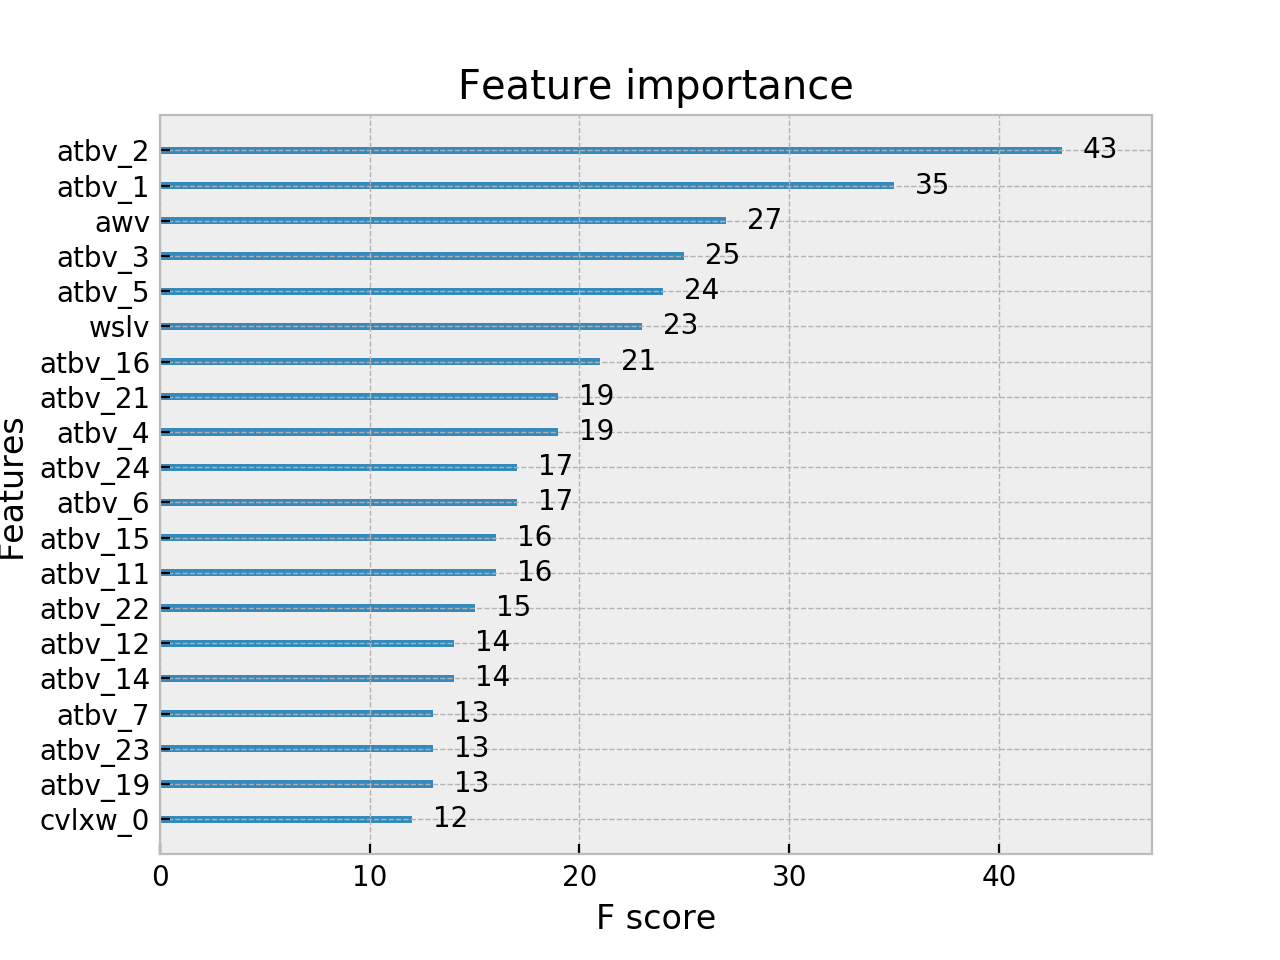

In [1081]:
# more features
xgb.plot_importance(clf_1,max_num_features=20)

---

#### Checks - 
- Overfitting or Underfitting? 
- Where are we less accurate?
  - for people that visit less often / more often 
  - confusion matrix, preicion and recall check  

In [971]:
val_eval = val_1_X.copy()
val_eval['pred'] =  clf_1.predict(val_1_X)
val_eval['act'] = val_1_Y

In [495]:
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix,\
precision_recall_curve,roc_curve, roc_auc_score

In [950]:
confusion_matrix(val_eval['act'], val_eval['pred'])

array([[ 47459,  84801],
       [ 32694, 125046]])

In [496]:
#old
confusion_matrix(val_eval['act'], val_eval['pred'])

array([[ 72933,  59327],
       [ 55843, 101897]])

In [497]:
72933 + 101897

174830

In [252]:
75177+99968

175145

In [972]:
print(classification_report(val_eval['act'], val_eval['pred'],target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56    132260
           1       0.63      0.65      0.64    157740

   micro avg       0.60      0.60      0.60    290000
   macro avg       0.60      0.60      0.60    290000
weighted avg       0.60      0.60      0.60    290000



In [468]:
val_eval['visits_week'] = data['visits_week']
# no. of visits per person
val_eval['visit_count'] = data['visits_int_arr'].apply(lambda x : len(x))

In [499]:
mask1 = (val_eval['act'] == 1) & (val_eval['pred'] == 0)
mask2 = (val_eval['act'] == 0) & (val_eval['pred'] == 1)

In [500]:
val_eval['cfy'] = 'correct'
val_eval.loc[mask1,'cfy'] = 'fn'
val_eval.loc[mask2,'cfy'] = 'fp'

In [501]:
val_eval.groupby('cfy').agg({ 'act': 'count'})

,act
cfy,
correct,174830
fn,55843
fp,59327


In [502]:
# old : val_eval.groupby('cfy').agg({ 'act': 'count'})

<IPython.core.display.Javascript object>


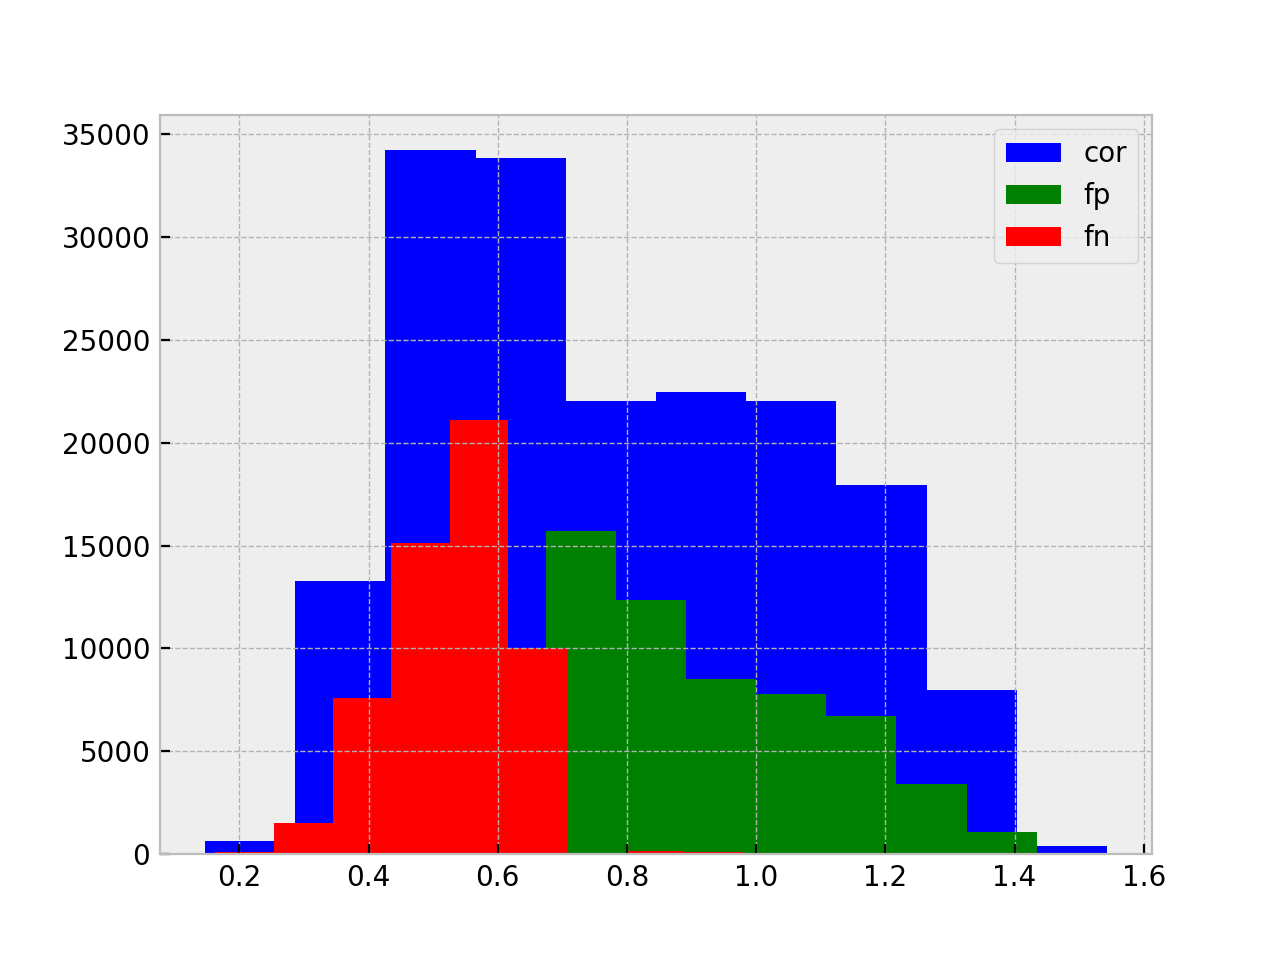

In [503]:
plt.figure()
x_1 = val_eval.loc[val_eval['cfy'] == 'correct', 'awv']
x_2 = val_eval.loc[val_eval['cfy'] == 'fp', 'awv']
x_3 = val_eval.loc[val_eval['cfy'] == 'fn', 'awv']
plt.hist(x_1, color = 'blue', label = 'cor')
plt.hist(x_2, color = 'green', label = 'fp')
plt.hist(x_3, color = 'red', label = 'fn')
plt.legend()

<IPython.core.display.Javascript object>


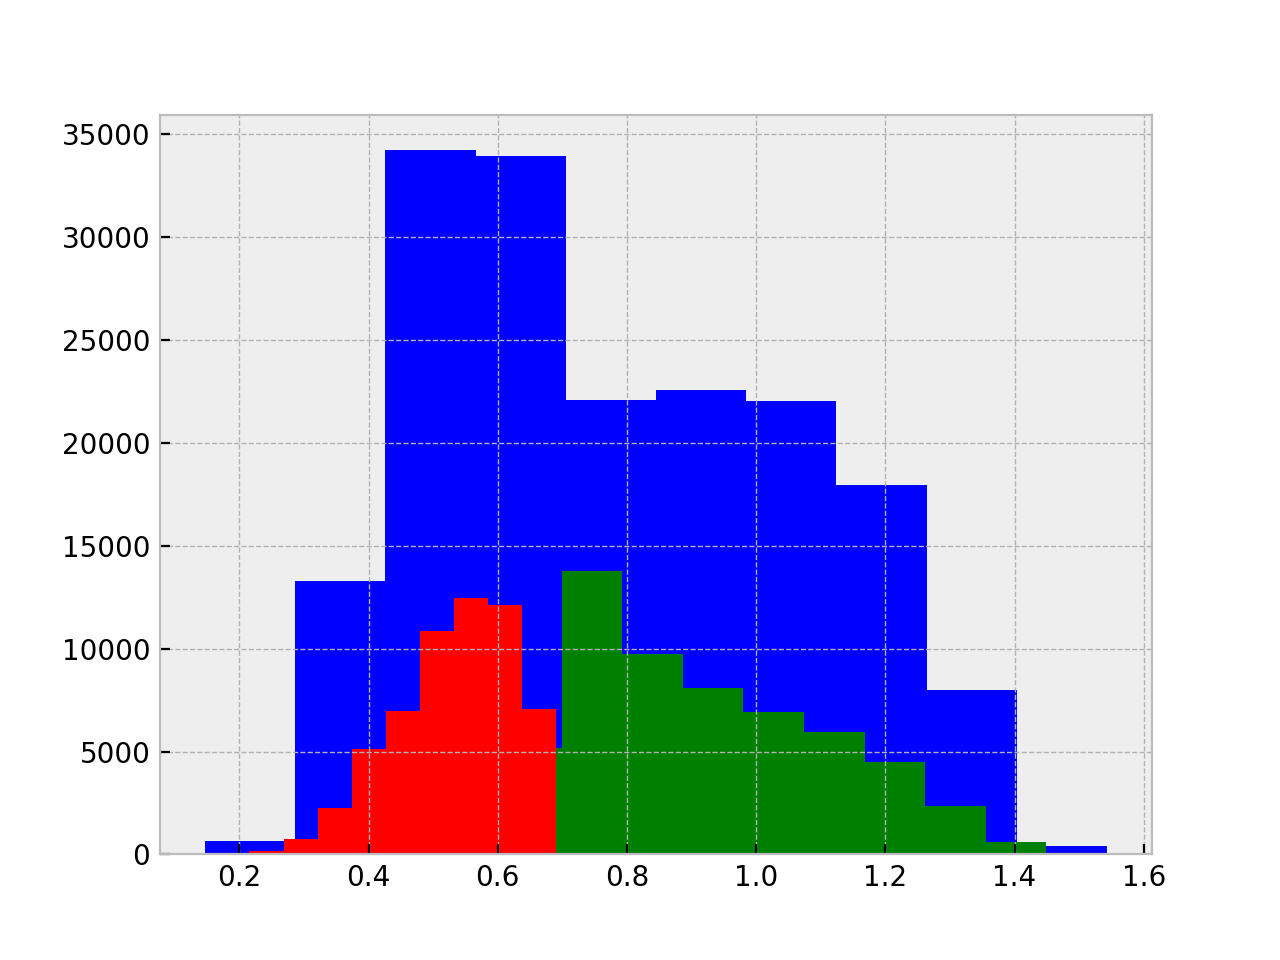

(array([    21.,    154.,    733.,   2250.,   5101.,   6990.,  10858.,
         12471.,  12114.,   7080.]),
 array([ 0.163 ,  0.2157,  0.2684,  0.3211,  0.3738,  0.4265,  0.4792,
         0.5319,  0.5846,  0.6373,  0.69  ]),
 <a list of 10 Patch objects>)

In [258]:
plt.figure()
x_1 = val_eval.loc[val_eval['cfy'] == 'correct', 'awv']
x_2 = val_eval.loc[val_eval['cfy'] == 'fp', 'awv']
x_3 = val_eval.loc[val_eval['cfy'] == 'fn', 'awv']
plt.hist(x_1, color = 'blue')
plt.hist(x_2, color = 'green')
plt.hist(x_3, color = 'red')

<IPython.core.display.Javascript object>


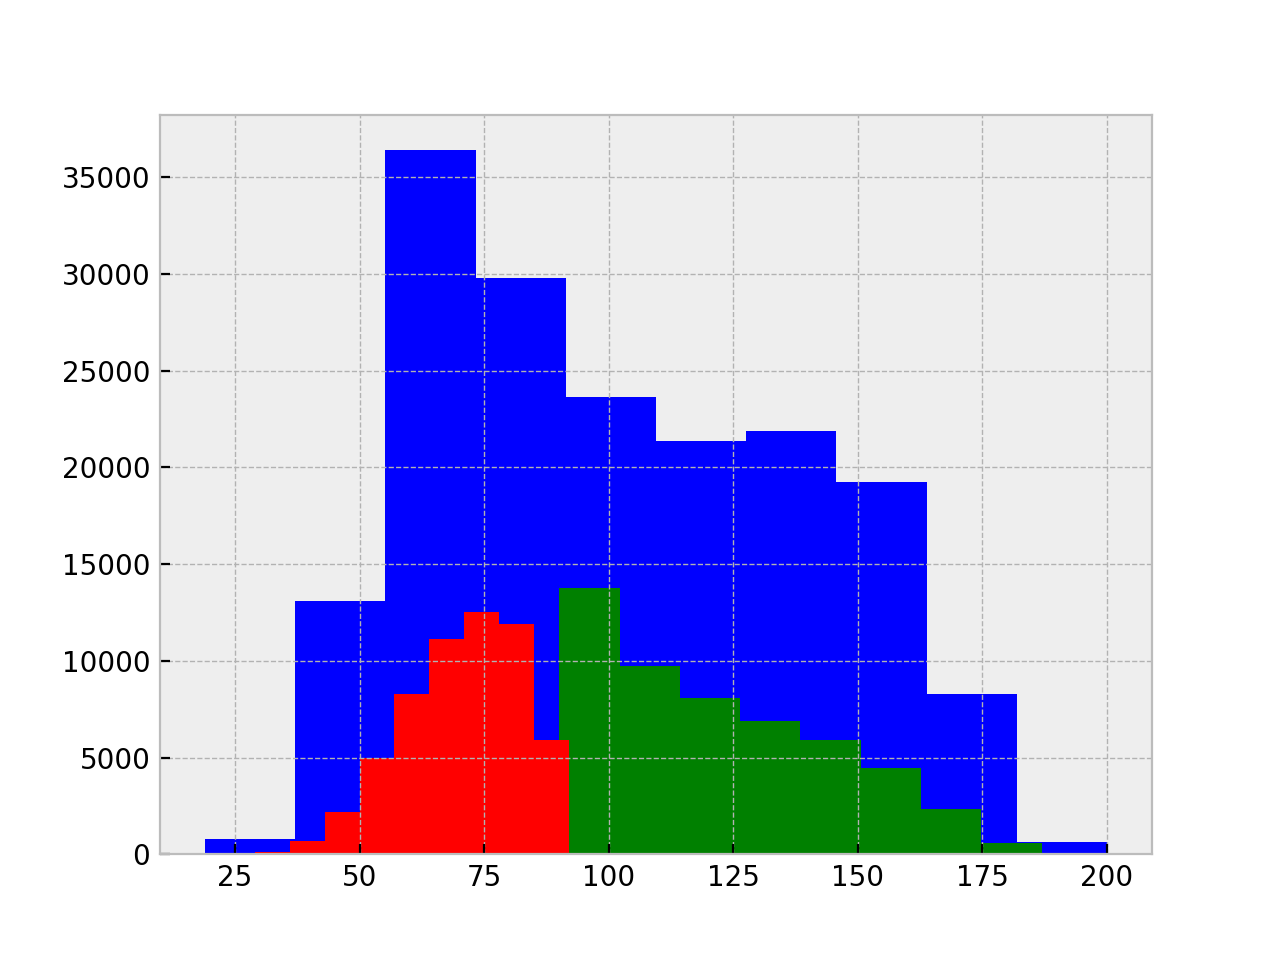

(array([    21.,    149.,    709.,   2190.,   4977.,   8264.,  11111.,
         12504.,  11910.,   5937.]),
 array([ 22.,  29.,  36.,  43.,  50.,  57.,  64.,  71.,  78.,  85.,  92.]),
 <a list of 10 Patch objects>)

In [261]:
plt.figure()
x_1 = val_eval.loc[val_eval['cfy'] == 'correct', 'visit_count']
x_2 = val_eval.loc[val_eval['cfy'] == 'fp', 'visit_count']
x_3 = val_eval.loc[val_eval['cfy'] == 'fn', 'visit_count']
plt.hist(x_1, color = 'blue')
plt.hist(x_2, color = 'green')
plt.hist(x_3, color = 'red')

In [ ]:
val_eval.loc[:,['visits_week', 'cfy', 'visit_count', 'visits_int_arr']]

In [262]:
data.columns

Index(['visits', 'visits_int_arr', 'visits_week', 'visit_count', 'first_day',
       'last_day'],
      dtype='object')

---

# Daily Model 
- Day preference (like day of week people visit?) 
  - avg. visits on each day of week for all visits from anchor week
- Peridic pattern (visit after x days) 
  - average time between visits in days with lags 
- recency
  - if you visited last xth week's m/t/w../s
  - days since last visit 
  

In [518]:
data.head()

,visits,visits_int_arr,visits_week,visit_count,first_day,last_day
visitor_id,,,,,,
1,30 84 126 135 137 179 242 342 426 456 460 462 ...,"[30, 84, 126, 135, 137, 179, 242, 342, 426, 45...","[5, 12, 18, 20, 20, 26, 35, 49, 61, 66, 66, 66...",22,30,886
2,24 53 75 134 158 192 194 211 213 238 251 305 4...,"[24, 53, 75, 134, 158, 192, 194, 211, 213, 238...","[4, 8, 11, 20, 23, 28, 28, 31, 31, 34, 36, 44,...",25,24,883
3,51 143 173 257 446 491 504 510 559 616 719 735...,"[51, 143, 173, 257, 446, 491, 504, 510, 559, 6...","[8, 21, 25, 37, 64, 71, 72, 73, 80, 88, 103, 1...",19,51,882
4,1 20 22 92 124 149 211 335 387 390 406 460 489...,"[1, 20, 22, 92, 124, 149, 211, 335, 387, 390, ...","[1, 3, 4, 14, 18, 22, 31, 48, 56, 56, 58, 66, ...",23,1,808
5,34 51 56 106 110 121 163 233 266 275 345 359 3...,"[34, 51, 56, 106, 110, 121, 163, 233, 266, 275...","[5, 8, 8, 16, 16, 18, 24, 34, 38, 40, 50, 52, ...",26,34,875


In [520]:
reload(dp)

<module 'data_prep' from '/Users/sumad/Documents/ShoppingMallDatachallenge/data_prep.py'>

In [522]:
# target
kwargs= {'target_week' : 129}
train_mc1_Y = data['visits_int_arr'].apply(dp.create_mclass_target, **kwargs)
x = np.bincount(train_mc1_Y)
print(x/np.sum(x))

kwargs= {'target_week' : 130}
val_mc1_Y = data['visits_int_arr'].apply(dp.create_mclass_target, **kwargs)
x = np.bincount(val_mc1_Y)
print(x/np.sum(x))

[ 0.45451379  0.09512759  0.06451034  0.06347241  0.06506897  0.06933103
  0.09915517  0.08882069]
[ 0.45606897  0.09268276  0.06325172  0.06453448  0.0646      0.06867241
  0.10021034  0.08997931]


In [538]:
train_mc1_X = pd.DataFrame(index = data.index, data = data.loc[:,'visits_int_arr'])
val_mc1_X = pd.DataFrame(index = data.index, data = data.loc[:,'visits_int_arr'])

In [539]:
train_mc1_X['visits_int_arr'].head()

visitor_id
1    [30, 84, 126, 135, 137, 179, 242, 342, 426, 45...
2    [24, 53, 75, 134, 158, 192, 194, 211, 213, 238...
3    [51, 143, 173, 257, 446, 491, 504, 510, 559, 6...
4    [1, 20, 22, 92, 124, 149, 211, 335, 387, 390, ...
5    [34, 51, 56, 106, 110, 121, 163, 233, 266, 275...
Name: visits_int_arr, dtype: object

In [534]:
reload(dp)

<module 'data_prep' from '/Users/sumad/Documents/ShoppingMallDatachallenge/data_prep.py'>

In [554]:
# Day preference features
start = time.time()
dpref_fxs = {'avbd' : dp.avg_visits_by_wkday,
            'adbv' : dp.avg_days_bw_visits}

lags = range(1,9)
#lags = [1,]
kwargs_train_mc1 ={
    'ad' : 896
}

for fx in dpref_fxs:
    if(fx == 'adbv'):
        for day in range(1,8):
            kwargs_train_mc1['day'] = day
            for lag in lags:
                kwargs_train_mc1['lag'] = lag
                cname = fx + '_' + str(day) + '_' + str(lag)
                train_mc1_X[cname] = train_mc1_X['visits_int_arr'].apply(dpref_fxs[fx], **kwargs_train_mc1)
    else:            
        for day in range(1,8):
            kwargs_train_mc1['day'] = day
            cname = fx + '_' + str(day)    
            train_mc1_X[cname] = train_mc1_X['visits_int_arr'].apply(dpref_fxs[fx], **kwargs_train_mc1)


kwargs_val_mc1 ={
    'ad' : 903
}
for fx in dpref_fxs:
    if(fx == 'adbv'):
        for day in range(1,8):
            kwargs_val_mc1['day'] = day
            for lag in lags:
                kwargs_val_mc1['lag'] = lag
                cname = fx + '_' + str(day) + '_' + str(lag)
                val_mc1_X[cname] = val_mc1_X['visits_int_arr'].apply(dpref_fxs[fx], **kwargs_val_mc1)
                
    else:
        for day in range(1,8):
            kwargs_val_mc1['day'] = day
            cname = fx + '_' + str(day)    
            val_mc1_X[cname] = val_mc1_X['visits_int_arr'].apply(dpref_fxs[fx], **kwargs_val_mc1)

end = time.time()
print((end-start)/60)    

22.15585327943166


In [558]:
# recency features
start = time.time()
rec_fxs = {'ivlxwd' : dp.ind_visit_last_x_wkday,
            'dslv' : dp.days_since_last_wday_visited}

xth_week = range(0,8)
#xth_week = [1,]
#lags = [1,]
kwargs_train_mc1 ={
    'ad' : 896
}

for fx in rec_fxs:
    if(fx == 'ivlxwd'):
        for day in range(1,8):
            kwargs_train_mc1['day'] = day
            for wk in xth_week:
                kwargs_train_mc1['xth_week'] = wk
                cname = fx + '_' + str(day) + '_' + str(wk)
                train_mc1_X[cname] = train_mc1_X['visits_int_arr'].apply(rec_fxs[fx], **kwargs_train_mc1)
    else:            
        for day in range(1,8):
            kwargs_train_mc1['day'] = day
            cname = fx + '_' + str(day)    
            train_mc1_X[cname] = train_mc1_X['visits_int_arr'].apply(rec_fxs[fx], **kwargs_train_mc1)


kwargs_val_mc1 ={
    'ad' : 903
}
for fx in rec_fxs:
    if(fx == 'ivlxwd'):
        for day in range(1,8):
            kwargs_val_mc1['day'] = day
            for wk in xth_week:
                kwargs_val_mc1['xth_week'] = wk
                cname = fx + '_' + str(day) + '_' + str(wk)
                val_mc1_X[cname] = val_mc1_X['visits_int_arr'].apply(rec_fxs[fx], **kwargs_val_mc1)
                
    else:
        for day in range(1,8):
            kwargs_val_mc1['day'] = day
            cname = fx + '_' + str(day)    
            val_mc1_X[cname] = val_mc1_X['visits_int_arr'].apply(rec_fxs[fx], **kwargs_val_mc1);
    
end = time.time()
print((end-start)/60)    

14.796957250436147


In [566]:
len(train_mc1_X.columns)


127

In [569]:
# replace NaNs with 0
print('-Train set -')
for col in [x for x in train_mc1_X.columns if x!= 'visits_int_arr']:
    nas = sum(train_mc1_X[col].apply(np.isnan))
    if(nas!=0):
        print(col , nas )
print('Val set -')
for col in [x for x in val_mc1_X.columns if x!= 'visits_int_arr']:
    nas = sum(val_mc1_X[col].apply(np.isnan)) 
    if(nas!=0):
        print(col , nas )

-Train set -
Val set -


In [568]:
# fix NaNs
lags = range(1,9)
days = range(1,8)
for day in days:
    for lag in lags:
        cname = 'adbv' + '_' + str(day) +  '_' + str(lag)
        train_mc1_X.loc[np.isnan(train_mc1_X[cname]), cname] = 0
        val_mc1_X.loc[np.isnan(val_mc1_X[cname]), cname] = 0

In [570]:
# drop extra columns 
train_mc1_X.drop(['visits_int_arr'],axis = 'columns', inplace = True)
val_mc1_X.drop(['visits_int_arr'],axis = 'columns', inplace = True)

In [571]:
train_mc1_X.to_csv('train_mc1_X.csv')
val_mc1_X.to_csv('val_mc1_X.csv')

In [584]:
val_mc1_X = val_mc1_X[train_mc1_X.columns]

In [952]:
def xgb_mc_f1(y,t):
    t = t.get_label()
    #y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y] # binaryzing your output
    y_com = np.asarray([np.argmax(line) for line in y])
    return 'f1_inv',1-f1_score(t,y_com, average = 'weighted')

In [1028]:
params_mc1 = {
    # general params
    'booster': 'gbtree',
    # booster params
    'learning_rate': 0.1,
    'max_depth': 6,
    'gamma': 0.1,
    'min_child_weight': 1,
    'max_delta_step': 0,
    'subsample': 1,
    'colsample_bylevel': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 1,
    # learning params
    #'objective': 'multi:softmax',
    'objective': 'multi:softprob',
    'base_score': 0.5,
    'n_estimators' : 100,
    'seed': 131,
    'n_jobs' : 4}

In [1029]:
clf_mc1 = xgb.XGBClassifier(**params_mc1)
clf_mc1.fit(train_mc1_X, train_mc1_Y, 
          early_stopping_rounds=10, 
          #eval_metric = xgb_mc_f1,
            eval_metric = 'mlogloss', 
        eval_set=[(val_mc1_X, val_mc1_Y)])

[0]	validation_0-mlogloss:2.01485
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.964
[2]	validation_0-mlogloss:1.92259
[3]	validation_0-mlogloss:1.88831
[4]	validation_0-mlogloss:1.85952
[5]	validation_0-mlogloss:1.83507
[6]	validation_0-mlogloss:1.81418
[7]	validation_0-mlogloss:1.79624
[8]	validation_0-mlogloss:1.78071
[9]	validation_0-mlogloss:1.76728
[10]	validation_0-mlogloss:1.7556
[11]	validation_0-mlogloss:1.7454
[12]	validation_0-mlogloss:1.73651
[13]	validation_0-mlogloss:1.72872
[14]	validation_0-mlogloss:1.72192
[15]	validation_0-mlogloss:1.71596
[16]	validation_0-mlogloss:1.71071
[17]	validation_0-mlogloss:1.70614
[18]	validation_0-mlogloss:1.70211
[19]	validation_0-mlogloss:1.69856
[20]	validation_0-mlogloss:1.69541
[21]	validation_0-mlogloss:1.69268
[22]	validation_0-mlogloss:1.69024
[23]	validation_0-mlogloss:1.68814
[24]	validation_0-mlogloss:1.68626
[25]	validation_0-mlogloss:1.68458
[26]	validation_0-mlogloss:1.68312


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=131, silent=True,
       subsample=1)

In [ ]:
# mlogloss 1.1.67229

In [960]:
#1-0.713647

In [ ]:
# using logloss, learning rate 0.3
#max_depth, min_child
# subsamples = 0.8

0.1, 6,1,0.8,0.8 - 1.67365

3,1 - 0.636061
3,3 - same
5,1 - 0.637246 
6,1/6,3 - 0.6384 (best, choose 6,3)
7,3 - 0.637265
8,3 - 0.638018 
8,6 - 0.638277 

# gamma tuning
6,6,0.1 - 0.640039
0.1 /0.2 - 0.638417
0.2/0.3 - 0.640039

# subsample tuning 
0.8 - best

#reg_alpha
0 - default
0.1 - 0.639944
0.01 - 0.640002
.001 - 0.640039 (best)

In [1082]:
val_mc_eval = val_mc1_X.copy()
val_mc_eval['pred_mc1'] =  clf_mc1.predict(val_mc1_X)
val_mc_eval['act'] = val_mc1_Y
val_mc_eval['pred_clf_1'] = clf_1.predict(val_1_X)

In [1083]:
#### ensemble of clf_1 and clf_mc1 
val_scored_clf_1_clf_mc1 = pd.DataFrame(index = val_1_X.index)
val_scored_clf_1_clf_mc1['act_mc'] = val_mc1_Y
val_scored_clf_1_clf_mc1['pred_clf_1'] = clf_1.predict(val_1_X)

In [1084]:
# val prediction from clf_mc1
prob_clf_mc1 = clf_mc1.predict_proba(val_mc1_X)
pred_clf_mc1 = []
for i in range(len(prob_clf_mc1)):
    prob_clf_mc1[i,0] = -1
    pred_clf_mc1.append(np.argmax(prob_clf_mc1[i]))
val_scored_clf_1_clf_mc1['pred_clf_mc1'] = pred_clf_mc1 

In [1085]:
mask = val_scored_clf_1_clf_mc1['pred_clf_1'] == 1 
val_scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'] = np.where(mask, val_scored_clf_1_clf_mc1['pred_clf_mc1'], 
                                                         val_scored_clf_1_clf_mc1['pred_clf_1'])                                           

#val_scored_clf_1_clf_mc1.head()

print(classification_report(val_scored_clf_1_clf_mc1['act_mc'], val_scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56    132260
           1       0.14      0.26      0.18     26878
           2       0.14      0.13      0.13     18343
           3       0.10      0.01      0.01     18715
           4       0.11      0.00      0.01     18734
           5       0.12      0.01      0.02     19915
           6       0.16      0.36      0.23     29061
           7       0.15      0.15      0.15     26094

   micro avg       0.34      0.34      0.34    290000
   macro avg       0.19      0.18      0.16    290000
weighted avg       0.33      0.34      0.32    290000



In [964]:
print(classification_report(val_mc_eval['act'], val_mc_eval['pred_mc1'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63    132260
           1       0.19      0.00      0.00     26878
           2       0.12      0.00      0.00     18343
           3       0.00      0.00      0.00     18715
           4       0.14      0.00      0.00     18734
           5       0.15      0.00      0.00     19915
           6       0.22      0.00      0.00     29061
           7       0.16      0.00      0.00     26094

   micro avg       0.46      0.46      0.46    290000
   macro avg       0.18      0.13      0.08    290000
weighted avg       0.29      0.46      0.29    290000



In [641]:
cm = confusion_matrix(val_mc_eval['act'], val_mc_eval['pred_mc1'])

In [642]:
import seaborn as sns

<IPython.core.display.Javascript object>


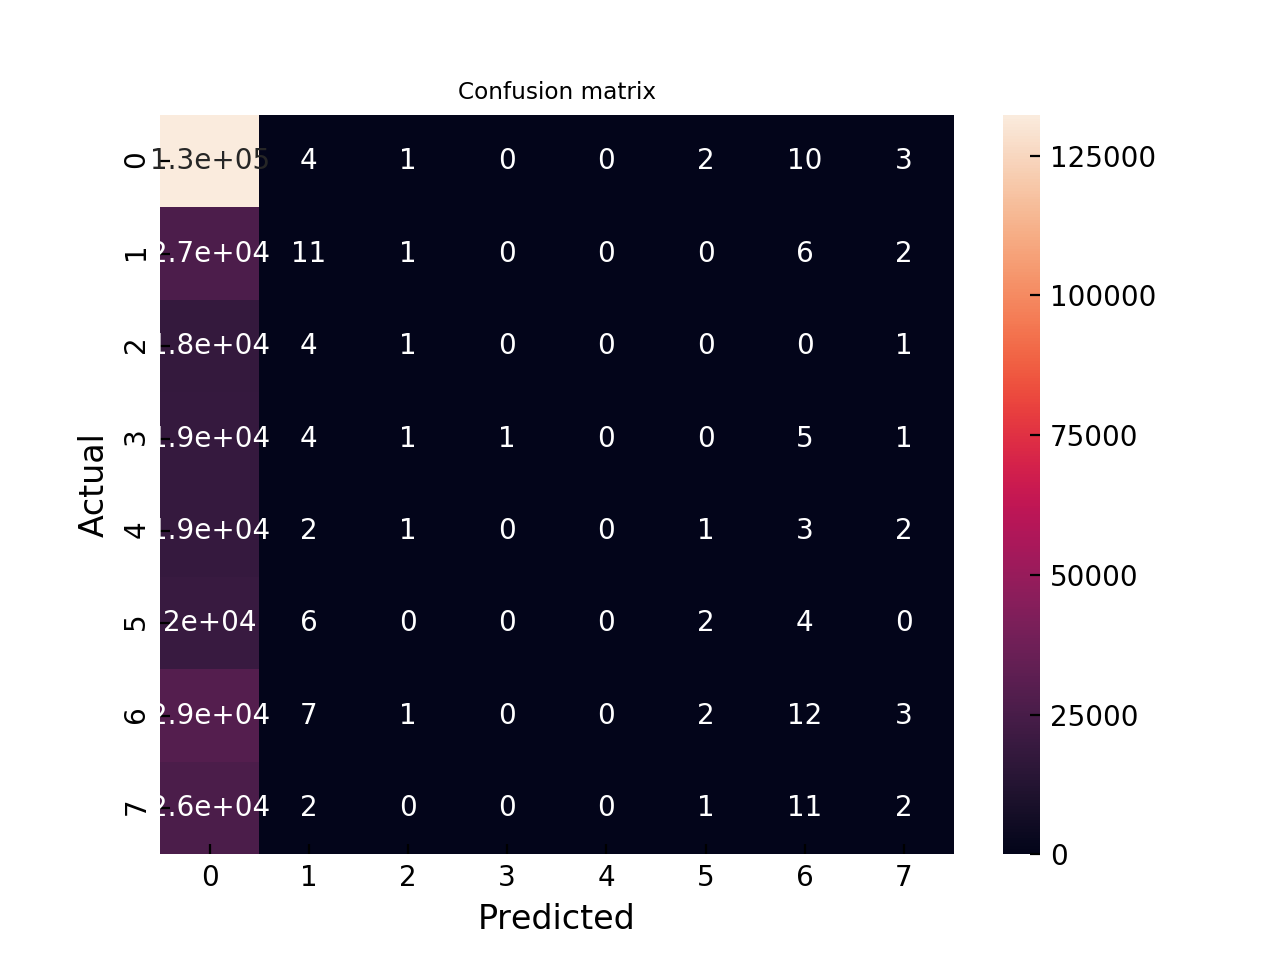

Text(0.5, 1.0, 'Confusion matrix')

In [643]:
plt.figure()
sns.heatmap(pd.DataFrame(cm, index = range(0,8), columns = range(0,8)), 
            annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix', fontsize = 'small')

In [ ]:
#max_depth, min_child
# subsamples = 0.8

3,1 - 0.636061
3,3 - same
5,1 - 0.637246 
6,1/6,3 - 0.6384 (best, choose 6,3)
7,3 - 0.637265
8,3 - 0.638018 
8,6 - 0.638277 

# gamma tuning
6,6,0.1 - 0.640039
0.1 /0.2 - 0.638417
0.2/0.3 - 0.640039

# subsample tuning 
0.8 - best

#reg_alpha
0 - default
0.1 - 0.639944
0.01 - 0.640002
.001 - 0.640039 (best)

In [586]:
1-0.713647

0.28635299999999997

In [775]:
xgb.plot_importance?

<IPython.core.display.Javascript object>


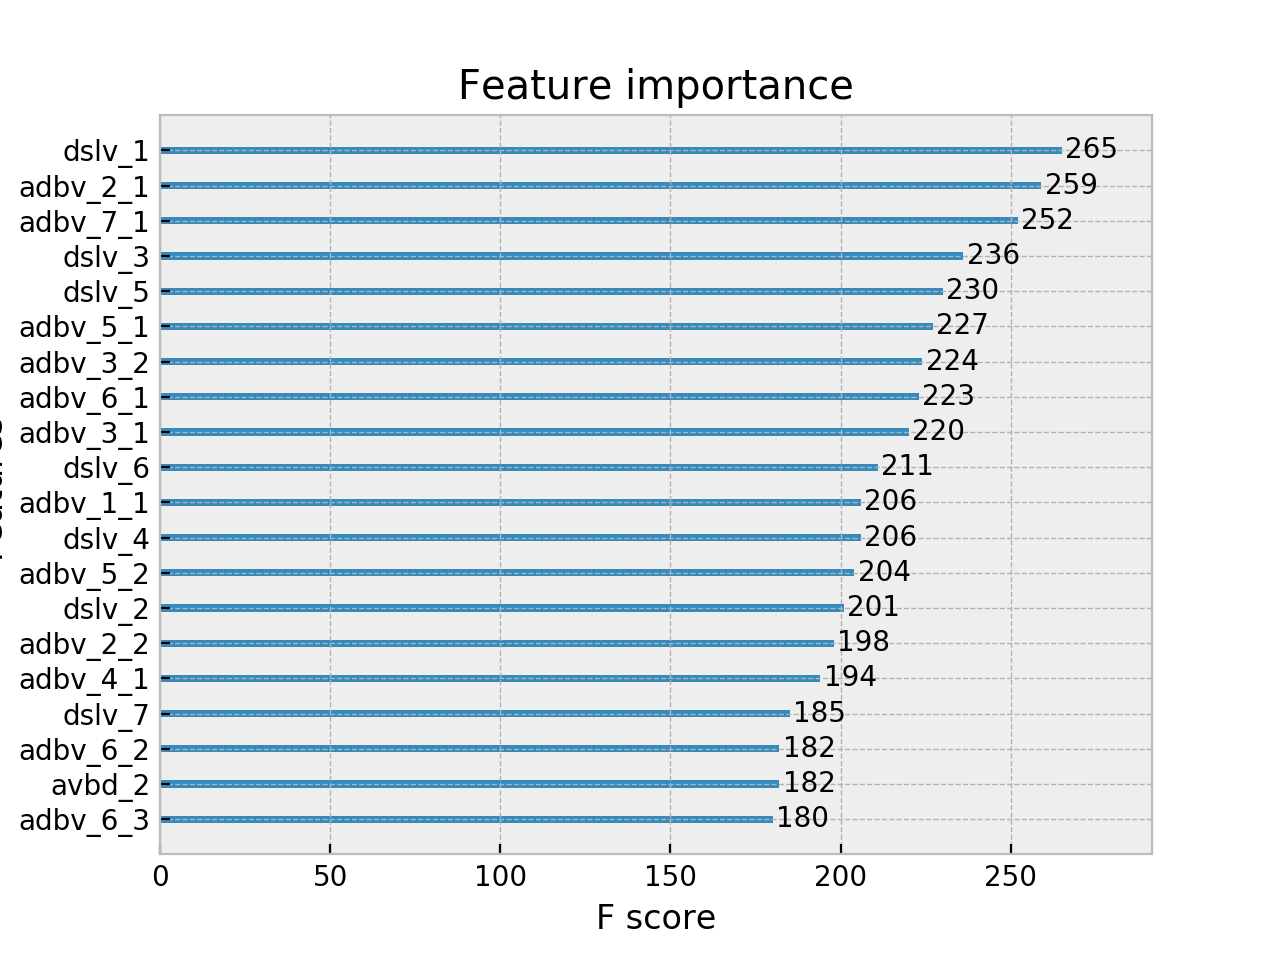

In [959]:
xgb.plot_importance(clf_mc1, max_num_features= 20)

In [608]:
wkly_mdl = val_eval.loc[:,['act','pred']]
daily_mdl = val_mc_eval['pred']

In [609]:
wkly_mdl['daily_pred'] = val_mc_eval['pred']

In [610]:
wkly_mdl.head()

,act,pred,daily_pred
visitor_id,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [611]:
mask1 = (wkly_mdl['act'] == 0) & (wkly_mdl['pred'] == 0)
mask2 = (wkly_mdl['act'] == 0) & (wkly_mdl['daily_pred'] == 0)
print(sum(mask1), sum(mask2))

72933 132240


In [612]:
mask3 = (wkly_mdl['act'] == 0) & (wkly_mdl['pred'] != 0)
mask4 = (wkly_mdl['act'] == 0) & (wkly_mdl['daily_pred'] != 0)
print(sum(mask3), sum(mask4))

59327 20


In [ ]:
### use daily model only on pred ==1 from weekly model

In [622]:
mask = wkly_mdl['pred'] == 1
sum(mask)
mask = clf_1.predict()

161224

In [625]:
train_mc1_Y.shape

(290000,)

In [1086]:
mask = val_scored_clf_1_clf_mc1['pred_clf_1'] == 1
train_mc1_X_sub = train_mc1_X.loc[mask,:]
train_mc1_Y_sub = train_mc1_Y.loc[mask]
val_mc1_X_sub = val_mc1_X.loc[mask,:]
val_mc1_Y_sub = val_mc1_Y.loc[mask]

In [1087]:
params_mc2 = {
    # general params
    'booster': 'gbtree',
    # booster params
    'learning_rate': 0.1,
    'max_depth': 6,
    'gamma': 0,
    'min_child_weight': 3,
    'max_delta_step': 0,
    'subsample': 1,
    'colsample_bylevel': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 1,
    # learning params
    'objective': 'multi:softprob',
    'base_score': 0.5,
    'n_estimators' : 100,
    'seed': 131,
    'n_jobs' : 4}

clf_mc2 = xgb.XGBClassifier(**params_mc2)
clf_mc2.fit(train_mc1_X_sub, train_mc1_Y_sub, 
          early_stopping_rounds=10, 
          #eval_metric = xgb_mc_f1,
            eval_metric = 'mlogloss',
        eval_set=[(val_mc1_X_sub, val_mc1_Y_sub)])

[0]	validation_0-mlogloss:2.04384
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:2.01442
[2]	validation_0-mlogloss:1.9897
[3]	validation_0-mlogloss:1.96867
[4]	validation_0-mlogloss:1.95068
[5]	validation_0-mlogloss:1.93514
[6]	validation_0-mlogloss:1.92175
[7]	validation_0-mlogloss:1.91
[8]	validation_0-mlogloss:1.89987
[9]	validation_0-mlogloss:1.89093
[10]	validation_0-mlogloss:1.88309
[11]	validation_0-mlogloss:1.87618
[12]	validation_0-mlogloss:1.87015
[13]	validation_0-mlogloss:1.86479
[14]	validation_0-mlogloss:1.86007
[15]	validation_0-mlogloss:1.85592
[16]	validation_0-mlogloss:1.85222
[17]	validation_0-mlogloss:1.84891
[18]	validation_0-mlogloss:1.84602
[19]	validation_0-mlogloss:1.84342
[20]	validation_0-mlogloss:1.8411
[21]	validation_0-mlogloss:1.83905
[22]	validation_0-mlogloss:1.83723
[23]	validation_0-mlogloss:1.83563
[24]	validation_0-mlogloss:1.83417
[25]	validation_0-mlogloss:1.83292
[26]	validation_0-mlogloss:1.83175
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=131,
       silent=True, subsample=1)

In [ ]:
0.1, 6,3,0.8/0.8 - 1.82317
0.3, 8,3,0.8/0.8
0.3, 6,6,0.8/0.8
0.3, 6,4,0.8/0.8
0.3, 6,6,0.8/0.8 - 1.82529
0.3, 6,6,0.1, 0.8/0.8 - 1.82528
0.3, 6,6,0.1, 0.9/0.9 - 1.82527


In [628]:
val_mc_eval_sub = val_mc1_X_sub.copy()
val_mc_eval_sub['pred_mc_sub'] =  clf_mc2.predict(val_mc1_X_sub)
val_mc_eval_sub['act'] = val_mc1_Y_sub

In [631]:
cm_sub = confusion_matrix(val_mc_eval_sub['act'], val_mc_eval_sub['pred_mc_sub'])   

<IPython.core.display.Javascript object>


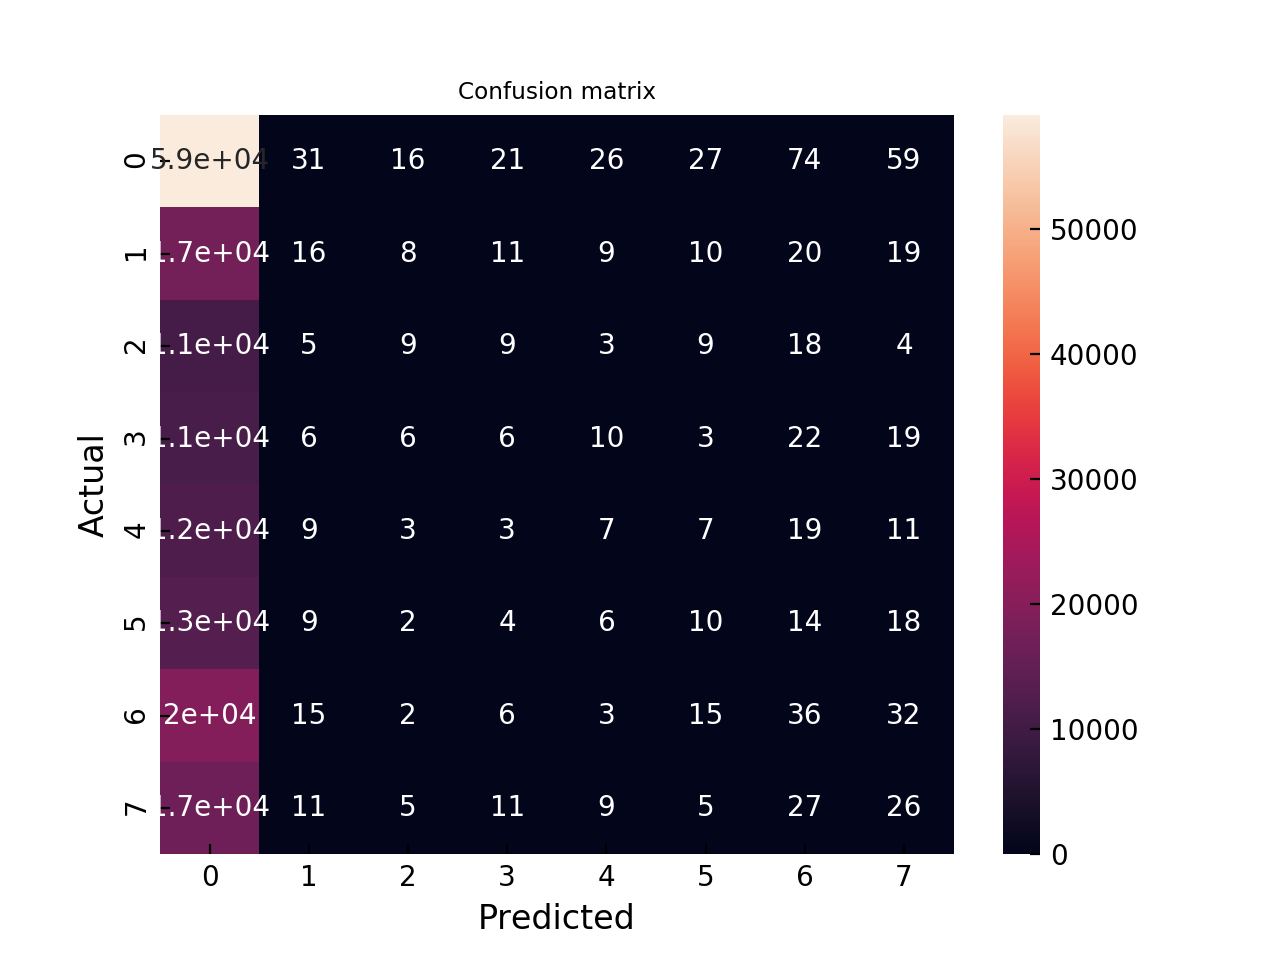

Text(0.5, 1.0, 'Confusion matrix')

In [632]:
plt.figure()
sns.heatmap(pd.DataFrame(cm_sub, index = range(0,8), columns = range(0,8)), 
            annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix', fontsize = 'small')

In [633]:
val_mc_eval_sub.head()

,avbd_1,avbd_2,avbd_3,avbd_4,avbd_5,avbd_6,avbd_7,adbv_1_1,adbv_1_2,adbv_1_3,...,ivlxwd_6_7,ivlxwd_7_0,ivlxwd_7_2,ivlxwd_7_3,ivlxwd_7_4,ivlxwd_7_5,ivlxwd_7_6,ivlxwd_7_7,pred_mc_sub,act
visitor_id,,,,,,,,,,,,,,,,,,,,,
6559,0.004,0.006,0.011,0.019,0.014,0.008,0.004,144.667,301.000,434.000,...,0,0,0,0,0,0,0,0,0,0
16970,0.017,0.003,0.003,0.009,0.010,0.010,0.017,53.000,106.615,155.750,...,0,0,0,0,0,0,0,0,0,6
18423,0.018,0.018,0.014,0.006,0.000,0.009,0.009,44.800,83.000,117.923,...,0,0,0,0,0,0,0,0,0,0
18505,0.007,0.012,0.013,0.007,0.006,0.014,0.011,93.800,166.250,252.000,...,0,0,0,0,0,0,0,0,0,0
20100,0.004,0.011,0.017,0.004,0.007,0.008,0.022,212.333,563.500,637.000,...,0,0,1,0,0,1,0,0,0,0


In [645]:
val_mc_eval['pred_wkly'] = val_eval['pred']

In [646]:
val_mc_eval['new_mix_pred'] = val_mc_eval['pred_wkly']

In [647]:
val_mc_eval.loc[val_mc_eval_sub.index,'new_mix_pred'] = val_mc_eval_sub['pred_mc_sub']

In [648]:
val_mc_eval.columns

Index(['avbd_1', 'avbd_2', 'avbd_3', 'avbd_4', 'avbd_5', 'avbd_6', 'avbd_7',
       'adbv_1_1', 'adbv_1_2', 'adbv_1_3',
       ...
       'ivlxwd_7_2', 'ivlxwd_7_3', 'ivlxwd_7_4', 'ivlxwd_7_5', 'ivlxwd_7_6',
       'ivlxwd_7_7', 'pred_mc1', 'act', 'pred_wkly', 'new_mix_pred'],
      dtype='object', length=130)

In [649]:
print(classification_report(val_mc_eval['act'], val_mc_eval['new_mix_pred'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63    132260
           1       0.16      0.00      0.00     26878
           2       0.18      0.00      0.00     18343
           3       0.08      0.00      0.00     18715
           4       0.10      0.00      0.00     18734
           5       0.12      0.00      0.00     19915
           6       0.16      0.00      0.00     29061
           7       0.14      0.00      0.00     26094

   micro avg       0.46      0.46      0.46    290000
   macro avg       0.17      0.13      0.08    290000
weighted avg       0.28      0.46      0.29    290000



In [651]:
print(classification_report(val_mc_eval['act'], val_mc_eval['pred_mc1'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63    132260
           1       0.28      0.00      0.00     26878
           2       0.17      0.00      0.00     18343
           3       1.00      0.00      0.00     18715
           4       0.00      0.00      0.00     18734
           5       0.25      0.00      0.00     19915
           6       0.24      0.00      0.00     29061
           7       0.14      0.00      0.00     26094

   micro avg       0.46      0.46      0.46    290000
   macro avg       0.32      0.13      0.08    290000
weighted avg       0.36      0.46      0.29    290000



/Users/sumad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Evaluate 3 ensembles on val

- clf_1 - wkly model
- clf_mc1 - daily model on full set
- clf_mc2 - daily model on subset of prediction made by clf_1
- lstm

### ensemble of clf_1 and clf_mc1 

In [1088]:
#### ensemble of clf_1 and clf_mc1 
val_scored_clf_1_clf_mc1 = pd.DataFrame(index = val_1_X.index)
val_scored_clf_1_clf_mc1['act_mc'] = val_mc1_Y
val_scored_clf_1_clf_mc1['pred_clf_1'] = clf_1.predict(val_1_X)

In [1089]:
np.bincount(val_scored_clf_1_clf_mc1["pred_clf_1"])

array([128776, 161224])

In [1090]:
np.bincount(val_scored_clf_1_clf_mc1['act_mc'])

array([132260,  26878,  18343,  18715,  18734,  19915,  29061,  26094])

In [1091]:
# val prediction from clf_mc1
prob_clf_mc1 = clf_mc1.predict_proba(val_mc1_X)
pred_clf_mc1 = []
for i in range(len(prob_clf_mc1)):
    prob_clf_mc1[i,0] = -1
    pred_clf_mc1.append(np.argmax(prob_clf_mc1[i]))
val_scored_clf_1_clf_mc1['pred_clf_mc1'] = pred_clf_mc1 

In [1092]:
val_scored_clf_1_clf_mc1['pred_clf_mc1'][0:5]

visitor_id
1    5
2    1
3    7
4    5
5    2
Name: pred_clf_mc1, dtype: int64

In [1093]:
np.bincount(val_scored_clf_1_clf_mc1['pred_clf_mc1'])

array([    0, 80291, 53991,  8134,  3181,  5481, 91752, 47170])

In [1094]:
np.sum(val_scored_clf_1_clf_mc1['pred_clf_mc1'] == 7)

47170

In [1095]:
prob_clf_mc1[0:5,:]

array([[-1.        ,  0.04513803,  0.04574902,  0.01842807,  0.04845093,
         0.06027635,  0.04070036,  0.04038994],
       [-1.        ,  0.04892854,  0.01540352,  0.04503857,  0.03950674,
         0.03582956,  0.03582279,  0.02861086],
       [-1.        ,  0.03192978,  0.03694831,  0.02186855,  0.04273757,
         0.04444418,  0.0410659 ,  0.06614153],
       [-1.        ,  0.04110994,  0.03060859,  0.03337129,  0.02829929,
         0.05591271,  0.02965312,  0.0240586 ],
       [-1.        ,  0.03591387,  0.0924018 ,  0.0219676 ,  0.02090641,
         0.05198142,  0.02197483,  0.03939055]], dtype=float32)

In [866]:
"""val_scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'] = val_scored_clf_1_clf_mc1['pred_clf_1']
mask = val_scored_clf_1_clf_mc1['pred_clf_1'] == 1 
val_scored_clf_1_clf_mc1.loc[mask,'ens_clf_1_clf_mc1'] = val_scored_clf_1_clf_mc1.loc[mask, 'pred_clf_mc1']""";

In [1096]:
mask = val_scored_clf_1_clf_mc1['pred_clf_1'] == 1 
val_scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'] = np.where(mask, val_scored_clf_1_clf_mc1['pred_clf_mc1'], 
                                                         val_scored_clf_1_clf_mc1['pred_clf_1'])                                           

In [1046]:
val_scored_clf_1_clf_mc1.head()

,act_mc,pred_clf_1,pred_clf_mc1,ens_clf_1_clf_mc1
visitor_id,,,,
1,0,0,5,0
2,0,0,1,0
3,0,0,7,0
4,0,0,5,0
5,0,0,2,0


In [1097]:
print(classification_report(val_scored_clf_1_clf_mc1['act_mc'], val_scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56    132260
           1       0.14      0.26      0.18     26878
           2       0.14      0.13      0.13     18343
           3       0.10      0.01      0.01     18715
           4       0.11      0.00      0.01     18734
           5       0.12      0.01      0.02     19915
           6       0.16      0.36      0.23     29061
           7       0.15      0.15      0.15     26094

   micro avg       0.34      0.34      0.34    290000
   macro avg       0.19      0.18      0.16    290000
weighted avg       0.33      0.34      0.32    290000



In [868]:
# old / without class_pos_weight
print(classification_report(val_scored_clf_1_clf_mc1['act_mc'], val_scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56    132260
           1       0.14      0.23      0.17     26878
           2       0.13      0.13      0.13     18343
           3       0.11      0.01      0.03     18715
           4       0.11      0.01      0.02     18734
           5       0.12      0.02      0.03     19915
           6       0.16      0.36      0.22     29061
           7       0.15      0.15      0.15     26094

   micro avg       0.33      0.33      0.33    290000
   macro avg       0.19      0.18      0.16    290000
weighted avg       0.33      0.33      0.32    290000



### ensemble of clf_1 and clf_mc2

In [1098]:
#### ensemble of clf_1 and clf_mc2
val_scored_clf_1_clf_mc2 = pd.DataFrame(index = val_mc1_X.index)
val_scored_clf_1_clf_mc2['act_mc'] = val_mc1_Y
val_scored_clf_1_clf_mc2['pred_clf_1'] = clf_1.predict(val_1_X)

In [1099]:
# val prediction from clf_mc2
prob_clf_mc2 = clf_mc2.predict_proba(val_mc1_X_sub)
pred_clf_mc2 = []
for i in range(len(prob_clf_mc2)):
    prob_clf_mc2[i,0] = -1
    pred_clf_mc2.append(np.argmax(prob_clf_mc2[i]))


In [1100]:
np.bincount(pred_clf_mc2)

array([    0, 50537, 16714,  1390,  1067,  2352, 63477, 25687])

In [1101]:
val_scored_clf_1_clf_mc2['ens_clf_1_clf_mc2'] = 0
val_scored_clf_1_clf_mc2.loc[val_mc1_X_sub.index,'ens_clf_1_clf_mc2'] = pred_clf_mc2 

In [1102]:
np.bincount(val_scored_clf_1_clf_mc2['ens_clf_1_clf_mc2'])

array([128776,  50537,  16714,   1390,   1067,   2352,  63477,  25687])

In [1103]:
val_scored_clf_1_clf_mc2.head()

,act_mc,pred_clf_1,ens_clf_1_clf_mc2
visitor_id,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [1104]:
 print(classification_report(val_scored_clf_1_clf_mc2['act_mc'], val_scored_clf_1_clf_mc2['ens_clf_1_clf_mc2'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56    132260
           1       0.14      0.27      0.18     26878
           2       0.14      0.12      0.13     18343
           3       0.10      0.01      0.01     18715
           4       0.11      0.01      0.01     18734
           5       0.12      0.01      0.03     19915
           6       0.16      0.36      0.22     29061
           7       0.15      0.15      0.15     26094

   micro avg       0.33      0.33      0.33    290000
   macro avg       0.19      0.18      0.16    290000
weighted avg       0.33      0.33      0.32    290000



In [897]:
#old 
print(classification_report(val_scored_clf_1_clf_mc2['act_mc'], val_scored_clf_1_clf_mc2['ens_clf_1_clf_mc2'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56    132260
           1       0.14      0.26      0.18     26878
           2       0.13      0.10      0.11     18343
           3       0.11      0.01      0.02     18715
           4       0.09      0.01      0.02     18734
           5       0.11      0.02      0.03     19915
           6       0.16      0.36      0.22     29061
           7       0.15      0.15      0.15     26094

   micro avg       0.33      0.33      0.33    290000
   macro avg       0.18      0.18      0.16    290000
weighted avg       0.33      0.33      0.32    290000



In [1055]:
f1_score(val_scored_clf_1_clf_mc2['act_mc'], val_scored_clf_1_clf_mc2['ens_clf_1_clf_mc2'],
                            #labels = ['0', '1','2', '3', '4', '5', '6','7'],
         average = 'weighted')

0.31930356872445409

In [898]:
#old
print(classification_report(val_scored_clf_1_clf_mc1['act_mc'], val_scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'],
                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56    132260
           1       0.14      0.23      0.17     26878
           2       0.13      0.13      0.13     18343
           3       0.11      0.01      0.03     18715
           4       0.11      0.01      0.02     18734
           5       0.12      0.02      0.03     19915
           6       0.16      0.36      0.22     29061
           7       0.15      0.15      0.15     26094

   micro avg       0.33      0.33      0.33    290000
   macro avg       0.19      0.18      0.16    290000
weighted avg       0.33      0.33      0.32    290000



In [1056]:
f1_score(val_scored_clf_1_clf_mc1['act_mc'], val_scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'],
                            #labels = ['0', '1','2', '3', '4', '5', '6','7'],
         average = 'weighted')

0.27378390424594101

In [1057]:
val_scored_clf_1_clf_mc1.head()

,act_mc,pred_clf_1,pred_clf_mc1,ens_clf_1_clf_mc1
visitor_id,,,,
1,0,0,5,0
2,0,0,1,0
3,0,0,7,0
4,0,0,5,0
5,0,0,2,0


In [1063]:
val_scored_clf_1_clf_mc2.head()

,act_mc,pred_clf_1,ens_clf_1_clf_mc2
visitor_id,,,
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [1062]:
val_scored_clf_1_clf_mc1.shape

(290000, 4)

In [1064]:
"""final = val_scored_clf_1_clf_mc1.copy()
final['ens_clf_1_clf_mc2'] = val_scored_clf_1_clf_mc2['ens_clf_1_clf_mc2']"""

In [1073]:
#final.head()

In [1066]:
"""prob_clf_mc1 = clf_mc1.predict_proba(val_mc1_X)
pred_clf_mc1_true = []
for i in range(len(prob_clf_mc1)):
    #prob_clf_mc1[i,0] = -1
    pred_clf_mc1_true.append(np.argmax(prob_clf_mc1[i]))
final['pred_clf_mc1_true'] = pred_clf_mc1_true """

In [1067]:
#np.bincount(final['pred_clf_mc1_true'])

array([289886,     38,     16,      2,      2,      9,     43,      4])

In [1070]:
#mask = (final['ens_clf_1_clf_mc2'] != 0) & (final['pred_clf_mc1_true'] == 0)
#final['ens_clf_1_clf_mc2_mc1'] = np.where(mask, final['pred_clf_mc1_true'], final['ens_clf_1_clf_mc2'])

In [1075]:
#print(classification_report(final['act_mc'], final['ens_clf_1_clf_mc2_mc1'],
#                            target_names = ['0', '1','2', '3', '4', '5', '6','7']))

---

# Scoring Code

In [ ]:
#### Train cl_1 ans mc1 models on 130th week

In [1114]:
params_1 = {
    # general params
    'booster': 'gbtree',
    # booster params
    'learning_rate': 0.1,
    'max_depth': 3,
    'gamma': 0.1,
    'min_child_weight': 6,
    'max_delta_step': 0,
    'subsample': 1,
    'colsample_bylevel': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    # learning params
    'objective': 'binary:logistic',
    'base_score': 0.5,
    'n_estimators' : 20,
    'seed': 131,
     'n_jobs' : 4,
    'scale_pos_weight' : 1}

clf_1_final = xgb.XGBClassifier(**params_1)
clf_1_final.fit(val_1_X, val_1_Y)
          #early_stopping_rounds=10, 
         # eval_metric = xgb_f1,
        #eval_set=[(val_1_X, val_1_Y)])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=6, missing=None,
       n_estimators=20, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.1,
       reg_lambda=1, scale_pos_weight=1, seed=131, silent=True,
       subsample=1)

In [1116]:

params_mc1 = {
    # general params
    'booster': 'gbtree',
    # booster params
    'learning_rate': 0.1,
    'max_depth': 6,
    'gamma': 0.1,
    'min_child_weight': 1,
    'max_delta_step': 0,
    'subsample': 1,
    'colsample_bylevel': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 1,
    # learning params
    #'objective': 'multi:softmax',
    'objective': 'multi:softprob',
    'base_score': 0.5,
    'n_estimators' : 63,
    'seed': 131,
    'n_jobs' : 4}
    #'num_round' : 63}

clf_mc1_final = xgb.XGBClassifier(**params_mc1)
clf_mc1_final.fit(val_mc1_X, val_mc1_Y)
          #early_stopping_rounds=10, 
          #eval_metric = xgb_mc_f1,
          #  eval_metric = 'mlogloss', 
        #eval_set=[(val_mc1_X, val_mc1_Y)])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=63, n_jobs=4, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=131, silent=True, subsample=1)

In [ ]:
# Features for weekly model

In [1105]:
scoring_X = pd.DataFrame(index = data.index, data = data.loc[:,'visits_week'])

#### frequency features
kwargs_scoring ={
    'aw' : 130,
    'lb' : 130
}

freq_fxs = {'awv' : dp.avg_wkly_visits,
            'mwv' : dp.median_wkly_visits}

start = time.time()
     
# score set                                   
for fx_name in freq_fxs:
    col_name = fx_name 
    #+ '_' + str(kwargs_val_1['aw']) + '_' + str(kwargs_val_1['lb'])
    scoring_X[col_name] = scoring_X['visits_week'].apply(freq_fxs[fx_name], **kwargs_scoring)
end = time.time()
print((end-start)/60)                                   

#### periodicity features

lags = list(np.arange(1,25,1))
per_fxs = {'atbv' : dp.avg_time_wks_bw_visits,
          'mtbv' : dp.median_time_wks_bw_visits}
#train set
start = time.time()

# scoring set
for lag in lags:
    kwargs_scoring['lag'] = lag
    for fx_name in per_fxs:
        col_name = fx_name + '_' + str(kwargs_scoring['lag'])
        #+ '_' + str(kwargs_val_1['aw']) + '_' + str(kwargs_val_1['lb'])\
                                                                  
        scoring_X[col_name] = scoring_X['visits_week'].apply(per_fxs[fx_name], **kwargs_scoring)        
end = time.time()
print((end-start)/60)                                                                      

#### Recency features
xth_week = list(np.arange(24))
rec_fxs = {'cvlxw' : dp.count_visits_last_x_week,
          'wslv' : dp.weeks_since_last_visit}

start = time.time()
      
# scoring set
for fx_name in rec_fxs:
    if(fx_name == 'cvlxw'):
        for x in xth_week:
            kwargs_scoring['xth_week'] = x
            col_name = fx_name + '_' + str(kwargs_scoring['xth_week'])       
            scoring_X[col_name] = scoring_X['visits_week'].apply(rec_fxs[fx_name], **kwargs_scoring)
    else:        
        col_name = fx_name      
        scoring_X[col_name] = scoring_X['visits_week'].apply(rec_fxs[fx_name], **kwargs_scoring)
        
end = time.time()
print((end-start)/60)                                                                      


5.90980091492335


/Users/sumad/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


19.918249436219533
0.7599316477775574


In [1108]:
# check NaNs
print('-Score set -')
for col in [x for x in scoring_X.columns if x!= 'visits_week']:
    nas = sum(scoring_X[col].apply(np.isnan))
    if(nas!=0):
        print(col , nas )

-Score set -


In [1107]:
cols_ = ['atbv', 'mtbv']
lags_ = [19,20,21,22,23,24]
for col_ in cols_:
    for lag_ in lags_:
        cname = col_ + '_' + str(lag_)
        scoring_X.loc[np.isnan(scoring_X[cname]), cname] = 0


In [1109]:
scoring_X.drop(["visits_week"], axis = 'columns',inplace= True)

In [1117]:
# Features for mc1 model
scoring_mc1 = pd.DataFrame(index = data.index, data = data.loc[:,'visits_int_arr'])

# Day preference features
start = time.time()
dpref_fxs = {'avbd' : dp.avg_visits_by_wkday,
            'adbv' : dp.avg_days_bw_visits}

lags = range(1,9)
#lags = [1,]
kwargs_scoring_mc1 ={
    'ad' : 910
}

for fx in dpref_fxs:
    if(fx == 'adbv'):
        for day in range(1,8):
            kwargs_scoring_mc1['day'] = day
            for lag in lags:
                kwargs_scoring_mc1['lag'] = lag
                cname = fx + '_' + str(day) + '_' + str(lag)
                scoring_mc1[cname] = scoring_mc1['visits_int_arr'].apply(dpref_fxs[fx], **kwargs_scoring_mc1)
    else:            
        for day in range(1,8):
            kwargs_scoring_mc1['day'] = day
            cname = fx + '_' + str(day)    
            scoring_mc1[cname] = scoring_mc1['visits_int_arr'].apply(dpref_fxs[fx], **kwargs_scoring_mc1)

end = time.time()
print((end-start)/60)    

# recency features
start = time.time()
rec_fxs = {'ivlxwd' : dp.ind_visit_last_x_wkday,
            'dslv' : dp.days_since_last_wday_visited}

xth_week = range(0,8)
#xth_week = [1,]
#lags = [1,]
kwargs_scoring_mc1 ={
    'ad' : 910
}

for fx in rec_fxs:
    if(fx == 'ivlxwd'):
        for day in range(1,8):
            kwargs_scoring_mc1['day'] = day
            for wk in xth_week:
                kwargs_scoring_mc1['xth_week'] = wk
                cname = fx + '_' + str(day) + '_' + str(wk)
                scoring_mc1[cname] = scoring_mc1['visits_int_arr'].apply(rec_fxs[fx], **kwargs_scoring_mc1)
    else:            
        for day in range(1,8):
            kwargs_scoring_mc1['day'] = day
            cname = fx + '_' + str(day)    
            scoring_mc1[cname] = scoring_mc1['visits_int_arr'].apply(rec_fxs[fx], **kwargs_scoring_mc1)

end = time.time()
print((end-start)/60)    


10.45993721485138
7.110332651933034


In [1120]:
# replace NaNs with 0
print('-Scoring set -')
for col in [x for x in scoring_mc1.columns if x!= 'visits_int_arr']:
    nas = sum(scoring_mc1[col].apply(np.isnan))
    if(nas!=0):
        print(col , nas )

-Scoring set -


In [1119]:
# fix NaNs
lags = range(1,9)
days = range(1,8)
for day in days:
    for lag in lags:
        cname = 'adbv' + '_' + str(day) +  '_' + str(lag)
        scoring_mc1.loc[np.isnan(scoring_mc1[cname]), cname] = 0

In [1121]:
# drop extra columns 
scoring_mc1.drop(['visits_int_arr'],axis = 'columns', inplace = True)

In [1127]:
z = [x for x in scoring_mc1.columns if x not in val_mc1_X.columns]
z

[]

In [1128]:
scoring_mc1 = scoring_mc1[val_mc1_X.columns]

In [1129]:
# Generate scores
#### ensemble of clf_1_final and clf_mc1_final 
scored_clf_1_clf_mc1 = pd.DataFrame(index = scoring_X.index)
scored_clf_1_clf_mc1['pred_clf_1'] = clf_1_final.predict(scoring_X)

# prediction from clf_mc1_final
prob_clf_mc1 = clf_mc1_final.predict_proba(scoring_mc1)
pred_clf_mc1 = []
for i in range(len(prob_clf_mc1)):
    prob_clf_mc1[i,0] = -1
    pred_clf_mc1.append(np.argmax(prob_clf_mc1[i]))
scored_clf_1_clf_mc1['pred_clf_mc1'] = pred_clf_mc1 

mask = scored_clf_1_clf_mc1['pred_clf_1'] == 1 
scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'] = np.where(mask, scored_clf_1_clf_mc1['pred_clf_mc1'], 
                                                         scored_clf_1_clf_mc1['pred_clf_1'])                                           



In [1130]:
np.bincount(scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'])

array([128264,  44832,  17238,   2407,    780,   2688,  65832,  27959])

In [1132]:
scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'].tail()

visitor_id
289996    6
289997    7
289998    1
289999    6
290000    1
Name: ens_clf_1_clf_mc1, dtype: int64

In [1135]:
# write scoring sheet out 
scored_clf_1_clf_mc1['ens_clf_1_clf_mc1'].to_csv('Data_Challenge_F02043/F02043_week131.csv')